# **Tugas Dicoding Proyek Akhir : Image Classification Model Deployment**

Nama : Moh Channa Beck Sutansyah

No Telepon : +6285728188067

Kota Tempat Tinggal : Kudus


**1. Install Library yang dibutuhkan seperti Tensorflow, Zipfile dan lain-lain**

In [ ]:
#Mengimport Library yang dibutuhkan
import tensorflow as tf
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


**2. Download Dataset Menggunakan Wget Command dan simpan di direktori temporary (/tmp/rockpaperscissors.zip)**

In [ ]:
#Mendapatkan dataset melalui wget command
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
     -O /tmp/rockpaperscissors.zip

--2021-07-12 15:34:48--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.76MB/s    in 55s     

2021-07-12 15:35:44 (5.61 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



**3.Ekstraksi File Zip Mengunakan Zipfile**

In [ ]:
# melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

**4.Install Tree Untuk Memudahkan Melihat Struktur File Secara Keseluruhan**

In [ ]:
#Menginstall tree
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (69.6 kB/s)
Selecting previously unselected package tree.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
#melihat struktur file dari rockpaperscissors
!tree -d '/tmp'

/tmp
├── initgoogle_syslog_dir.0
├── __MACOSX
│   └── rockpaperscissors
│       ├── paper
│       ├── rock
│       ├── rps-cv-images
│       │   ├── paper
│       │   ├── rock
│       │   └── scissors
│       └── scissors
└── rockpaperscissors
    ├── paper
    ├── rock
    ├── rps-cv-images
    │   ├── paper
    │   ├── rock
    │   └── scissors
    └── scissors

18 directories


**5. Install Split Folder dan Split Folder Train dan Validation dengan Ratio 80% : 20%**

In [ ]:
#Install Split_Folder untuk membagi image folder menjadi train dan validation
!pip install split_folders

In [ ]:
#Membagi Image menjadi 80% Train dan 20% Validation
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', '/tmp/rockpaperscissors/rps-cv-images/base', seed=1, ratio=(.8, .2))

Copying files: 2188 files [00:00, 4476.68 files/s]


In [ ]:
#cek lagi struktur file base
!tree -d '/tmp'

/tmp
├── initgoogle_syslog_dir.0
├── __MACOSX
│   └── rockpaperscissors
│       ├── paper
│       ├── rock
│       ├── rps-cv-images
│       │   ├── paper
│       │   ├── rock
│       │   └── scissors
│       └── scissors
└── rockpaperscissors
    ├── paper
    ├── rock
    ├── rps-cv-images
    │   ├── base
    │   │   ├── train
    │   │   │   ├── paper
    │   │   │   ├── rock
    │   │   │   └── scissors
    │   │   └── val
    │   │       ├── paper
    │   │       ├── rock
    │   │       └── scissors
    │   ├── paper
    │   ├── rock
    │   └── scissors
    └── scissors

27 directories


In [ ]:
#Menentukan direktori train dan validation
train_dir = '/tmp/rockpaperscissors/rps-cv-images/base/train'
val_dir = '/tmp/rockpaperscissors/rps-cv-images/base/val'

In [ ]:
import numpy as np
#Mengecek jumlah data train dan validation
length_train_paper = len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/base/train/paper'))
length_train_rock = len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/base/train/rock'))
length_train_scissors = len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/base/train/scissors'))
length_train = length_train_paper + length_train_rock + length_train_scissors

length_val_paper = len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/base/val/paper'))
length_val_rock = len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/base/val/rock'))
length_val_scissors = len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/base/val/scissors'))
length_val = length_val_paper + length_val_rock + length_val_scissors

print('Jumlah Data Train :' + str(length_train))
print('Jumlah Data Validasi :' + str(length_val))



Disini sudah memnuhi data training memiliki 1314 sampel, dan data validasi sebanyak 876 sampel
Jumlah Data Train :1749
Jumlah Data Validasi :439


**6. Augmentasi Gambar Menggunakan Image Data Generator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=25,
                    horizontal_flip=True,
                    shear_range = 0.3,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=25,
                    horizontal_flip=True,
                    shear_range = 0.3,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=32,
        class_mode='categorical')   # karena merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
 
validation_generator = test_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150),
        batch_size=32, 
        class_mode='categorical') # karena merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


**7. Membangun Arsitektur CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.optimizers import SGD
                               
model =  tf.keras.models.Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

**8. Melakukan Optimasi Menggunakan SGD sebagai Optimizer**

In [ ]:
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 50

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
# latih model dengan model.fit 
history = model.fit(train_generator,
          steps_per_epoch=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=validation_generator,
          validation_steps=5,
          verbose=2,callbacks=[callback])

Epoch 1/50
32/32 - 40s - loss: 1.1295 - accuracy: 0.3398 - val_loss: 1.0984 - val_accuracy: 0.3375
Epoch 2/50
32/32 - 8s - loss: 1.0978 - accuracy: 0.3555 - val_loss: 1.0937 - val_accuracy: 0.4125
Epoch 3/50
32/32 - 8s - loss: 1.0821 - accuracy: 0.4087 - val_loss: 1.0837 - val_accuracy: 0.4125
Epoch 4/50
32/32 - 8s - loss: 0.7831 - accuracy: 0.6723 - val_loss: 0.5596 - val_accuracy: 0.8313
Epoch 5/50
32/32 - 8s - loss: 0.3899 - accuracy: 0.8662 - val_loss: 0.3078 - val_accuracy: 0.9312
Epoch 6/50
32/32 - 8s - loss: 0.3257 - accuracy: 0.8914 - val_loss: 0.2978 - val_accuracy: 0.9563
Epoch 7/50
32/32 - 8s - loss: 0.2747 - accuracy: 0.9092 - val_loss: 0.3069 - val_accuracy: 0.9438
Epoch 8/50
32/32 - 8s - loss: 0.2740 - accuracy: 0.8945 - val_loss: 0.2295 - val_accuracy: 0.9438
Epoch 9/50
32/32 - 8s - loss: 0.2173 - accuracy: 0.9268 - val_loss: 0.1537 - val_accuracy: 0.9625
Epoch 10/50
32/32 - 8s - loss: 0.2026 - accuracy: 0.9309 - val_loss: 0.1323 - val_accuracy: 0.9625
Epoch 11/50
32/32 

**9. Evaluasi Model**

In [ ]:
nilai = model.evaluate(train_generator)

print('Loss: '+ str(nilai[0]))
print('Accuracy: ' + str(nilai[1]))

55/55 [==============================] - 11s 200ms/step - loss: 0.0685 - accuracy: 0.9851
Loss: 0.06849917024374008
Accuracy: 0.9851343631744385


In [ ]:
nilai = model.evaluate(validation_generator)

print('Loss: '+ str(nilai[0]))
print('Accuracy: ' + str(nilai[1]))

14/14 [==============================] - 3s 213ms/step - loss: 0.0490 - accuracy: 0.9909
Loss: 0.04903996363282204
Accuracy: 0.9908883571624756


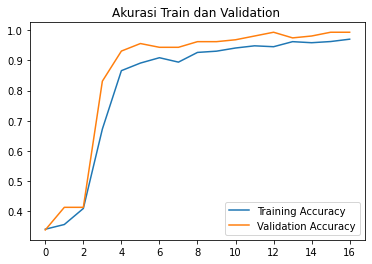

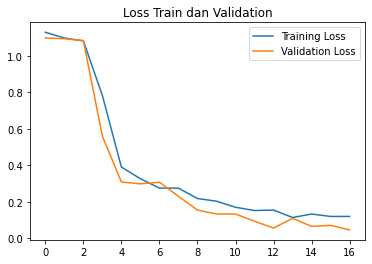

In [ ]:
#Memvisualisasikan Akurasi dan Loss dari tiap-tiap Epochs
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(17)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Akurasi Train dan Validation ')
plt.legend()
plt.show()

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Loss Train dan Validation')
plt.legend()
plt.show()

Saving tangan.jpg to tangan.jpg
tangan.jpg
Gambar yang diupload adalah
Paper


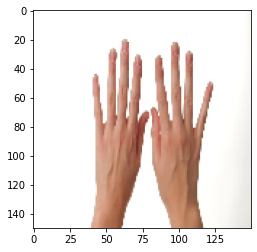

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for upload_file in uploaded.keys():
 
  # memprediksi gambar
  path = upload_file
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(upload_file)
  if classes[0,0]==1:
    print('Gambar yang diupload adalah')
    print('Paper')
  elif classes[0,1]==1:
    print('Gambar yang diupload adalah')
    print('Rock')
  else:
    print('Gambar yang diupload adalah')
    print('Scissor')

**9. Konversi Model Ke TF Lite**

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmphwsxj4b_/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)